In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import cartopy.feature as feature

In [2]:
date_str = "20241216"

In [3]:
#--- Gulf Stream
# latitude_north = 51
# latitude_south = 30
# longitude_west = -80
# longitude_east = -55

#--- Oaxaca (zoomed in)
latitude_north = 21
latitude_south = 8
longitude_west = -105
longitude_east = -85

In [4]:
gfs_file = 'model_data/gfs_'+date_str
gfs_ds = xr.open_dataset(gfs_file, engine="cfgrib",backend_kwargs={'filter_by_keys': {'typeOfLevel':'isobaricInhPa'}})

skipping variable: paramId==228164 shortName='tcc'
Traceback (most recent call last):
  File "/Applications/anaconda3/envs/FLC_paper/lib/python3.12/site-packages/cfgrib/dataset.py", line 725, in build_dataset_components
    dict_merge(variables, coord_vars)
  File "/Applications/anaconda3/envs/FLC_paper/lib/python3.12/site-packages/cfgrib/dataset.py", line 641, in dict_merge
    raise DatasetBuildError(
cfgrib.dataset.DatasetBuildError: key present and new value is different: key='isobaricInhPa' value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,  250.,
        200.,  150.,  100.,   70.,   50.,   40.,   30.,   20.,   15.,
         10.,    7.,    5.,    3.,    2.,    1.])) new_value=Variable(dimensions=('isobaricInhPa',), data=array([1000.,  975.,  950.,  925.,  900.,  850.,  800.,  750.,  700.,
        650.,  600.,  550.,  500.,  450.,  400.,  350.,  300.,

In [5]:
gfs_ds_surface = gfs_ds.sel(isobaricInhPa=1000)

/var/folders/s0/p4kwg0r17s59t6f4g9btngzw0000gn/T/ipykernel_11710/2986875529.py:33: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


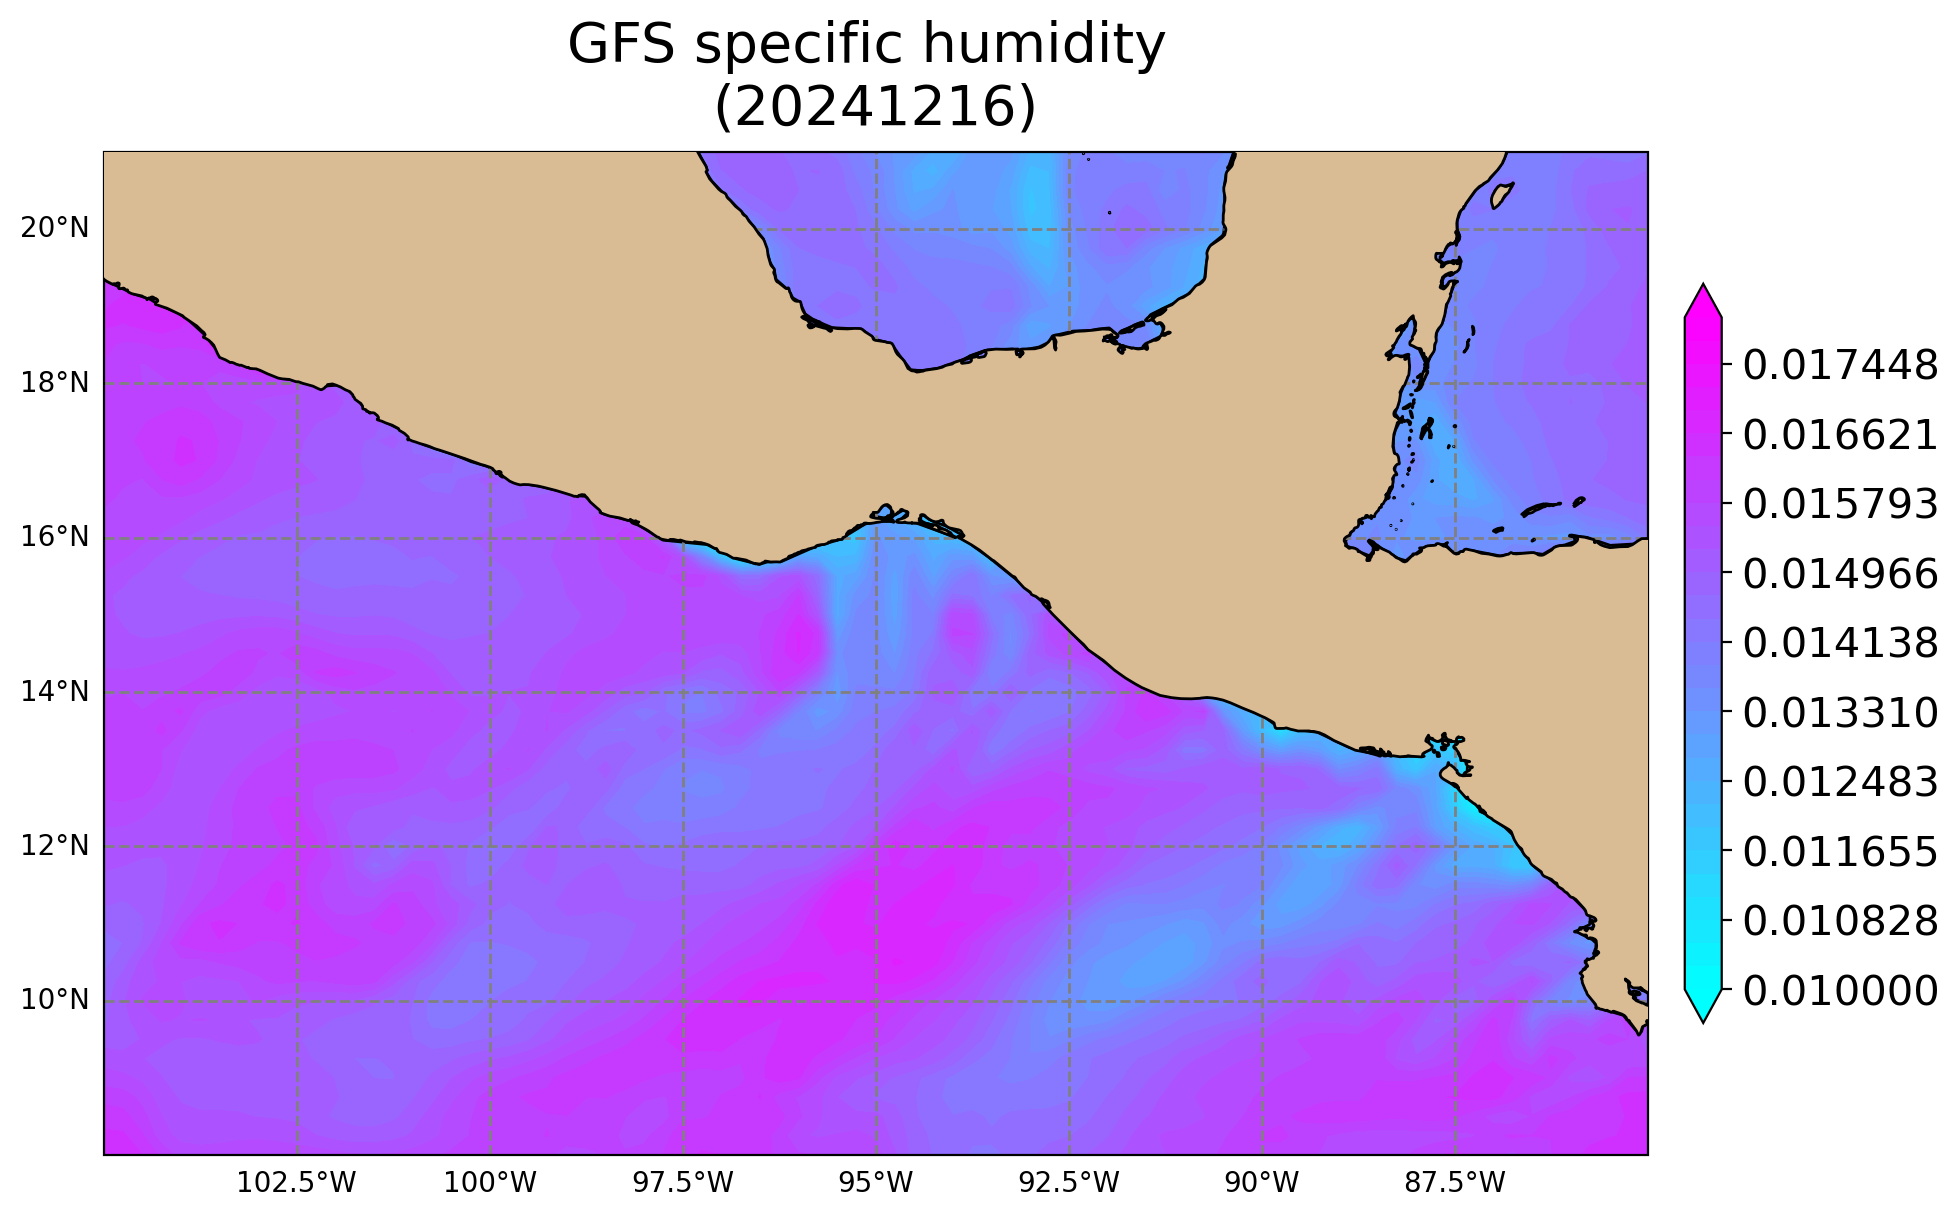

In [6]:
projection=ccrs.PlateCarree(central_longitude=0)
fig,ax=plt.subplots(1, figsize=(12,12),subplot_kw={'projection': projection})

levels = np.linspace(0.01, 0.018, 30)
cmap = plt.get_cmap('cool')

c=ax.contourf(gfs_ds_surface.longitude, gfs_ds_surface.latitude, gfs_ds_surface['q'].values, cmap=cmap, extend='both', levels=levels)

clb = plt.colorbar(c, shrink=0.4, pad=0.02, ax=ax, extend='both')
clb.ax.tick_params(labelsize=15)
#clb.set_label('(K)', fontsize=15)
#custom_ticks = [295, 296, 297, 298, 299, 300, 301, 302]
#clb.set_ticks(custom_ticks)

ax.set_extent([longitude_west, longitude_east, latitude_south, latitude_north], crs=ccrs.PlateCarree())

ax.set_title("GFS specific humidity \n("+date_str[:10]+")", fontsize=20, pad=10)
ax.coastlines(resolution='50m', color='black', linewidth=1)

#--- Land in tan
ax.add_feature(feature.LAND, zorder=100, edgecolor='#000', facecolor='#DABC94')

#--- Lat and Lon lines
gl = ax.gridlines(draw_labels=True, linewidth=1, color='gray', linestyle='--', zorder=5)
gl.top_labels = False
gl.right_labels = False

ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'{x:.1f}°E' if x >= 0 else f'{-x:.1f}°W'))
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'{y:.1f}°N' if y >= 0 else f'{-y:.1f}°S'))


fig.set_dpi(200)
fig.show()